# **Linking to Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **Importing Libraries and Reading the Dataset**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import confusion_matrix

In [3]:
cs = pd.read_csv('/content/drive/MyDrive/Elevvo Pathways Tasks/Task 2: Customer Segmentation/Mall_Customers.csv')
cs.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data inspection**

In [4]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
cs.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
#!pip install ydata_profiling
#from ydata_profiling import ProfileReport
#profile = ProfileReport(cs)
#profile.to_file("customer_segmentation.html")

# **Data Cleaning**

**Dropping The ID Column**

In [7]:
cs = cs.drop("CustomerID", axis=1)

In [8]:
cs.quantile([0, 0.1, 0.25,  0.9, 0.95, 0.99, 0.995, 0.999, 1], numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
0.000,18.00,15.00,1.000
0.100,21.00,23.90,13.000
0.250,28.75,41.50,34.750
0.900,59.10,93.40,87.100
0.950,66.05,103.00,92.000
0.990,69.01,126.11,97.010
0.995,70.00,137.00,98.005
0.999,70.00,137.00,98.801
1.000,70.00,137.00,99.000


**Handling Outliers**

In [9]:
cs = cs[cs['Annual Income (k$)']<cs['Annual Income (k$)'].quantile(0.990)]

# **Numerical Data Visualization**

**Histograms**


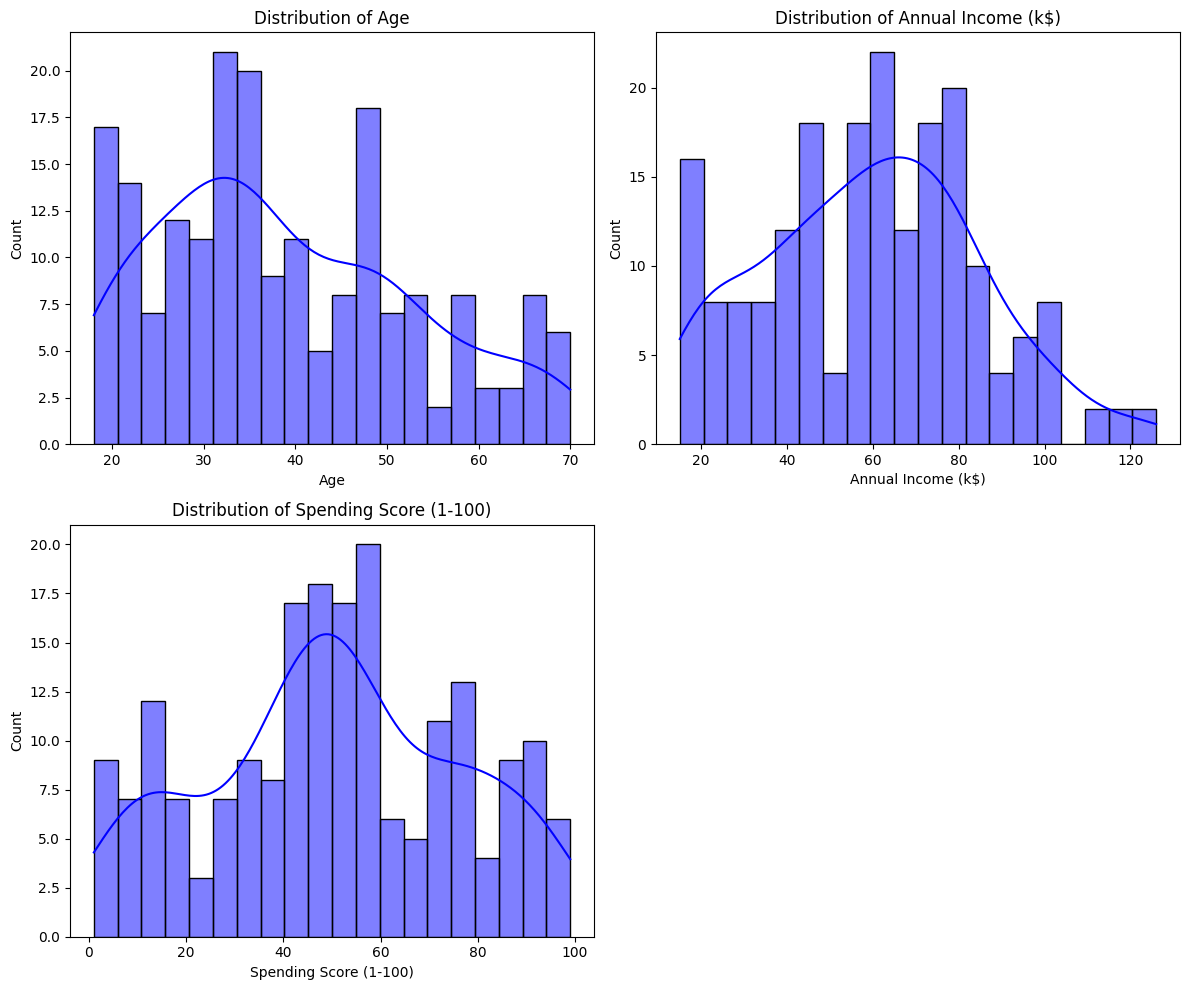

In [10]:
features=['Age','Annual Income (k$)','Spending Score (1-100)']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    sns.histplot(cs[col],bins=20,kde=True,color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**Box Plots**

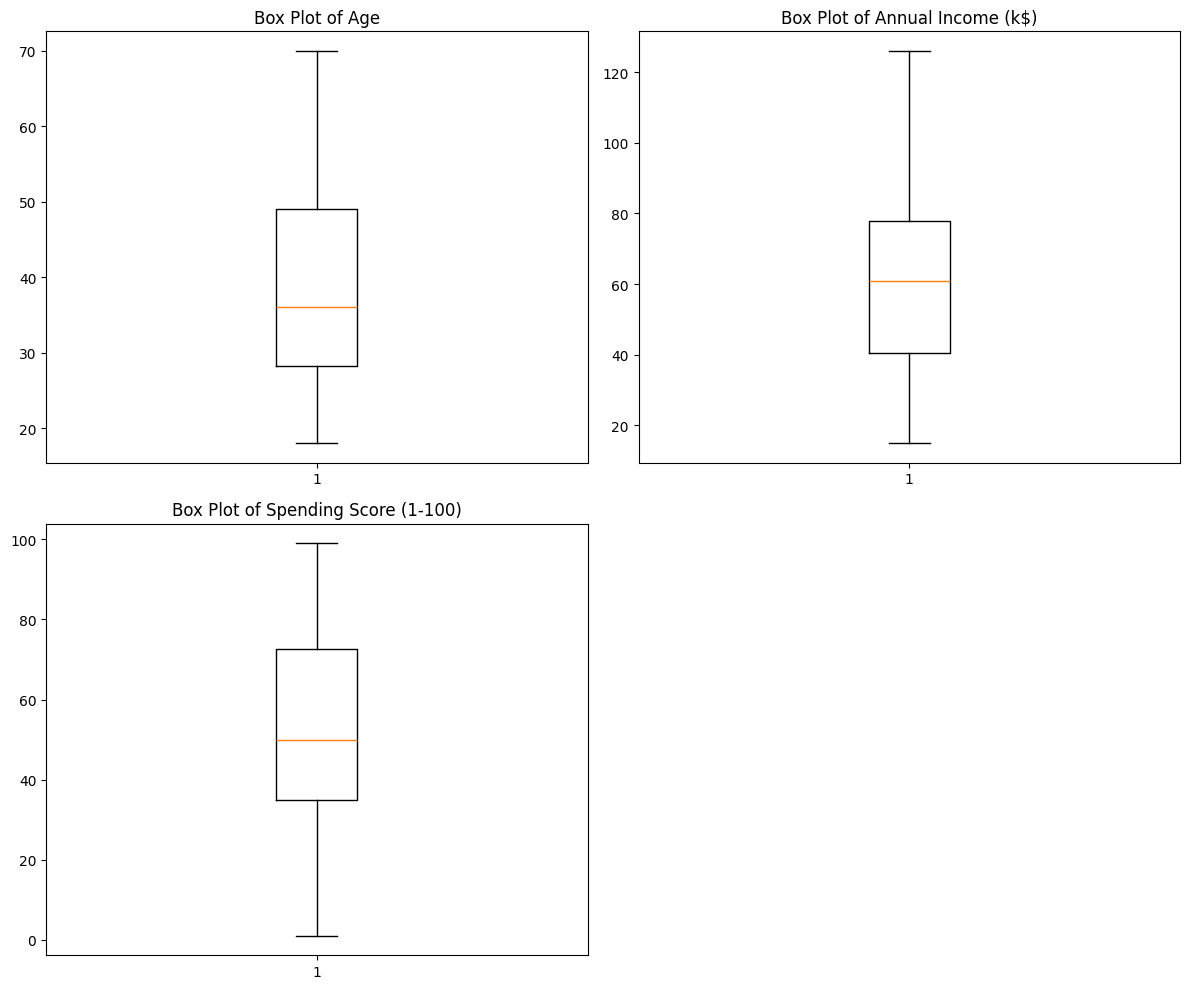

In [11]:
features=['Age','Annual Income (k$)','Spending Score (1-100)']
plt.figure(figsize=(12,10))
for i,col in enumerate(features,1):
    plt.subplot(2,2,i)
    plt.boxplot(cs[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()

**Heatmap to Show Correlation**

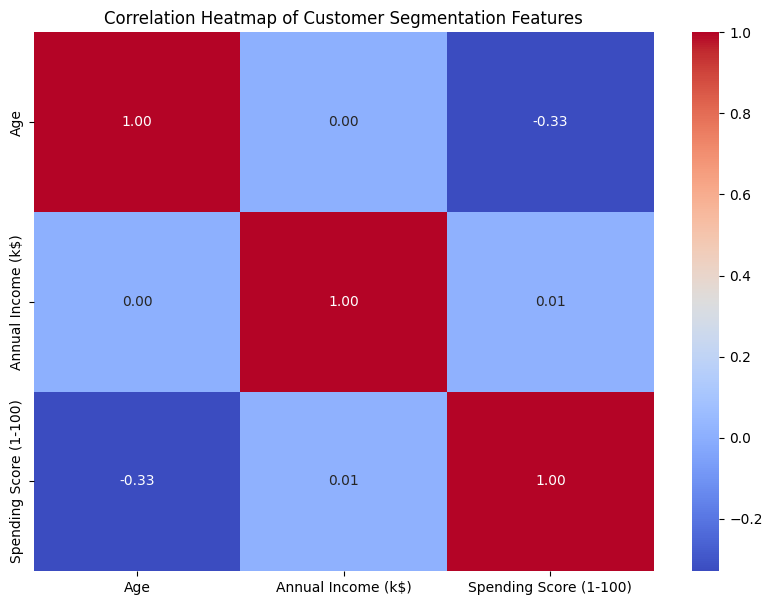

In [12]:
features = cs.select_dtypes(include=['number'])
plt.figure(figsize=(10,7))
sns.heatmap(features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Customer Segmentation Features")
plt.show()

# **categorical Data Visualization**

**Count Plots**

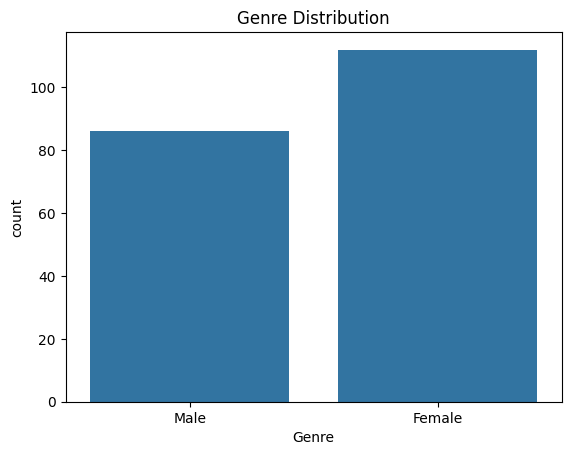

In [13]:
features=cs.select_dtypes(include=['object', 'category', 'boolean']).columns.tolist()
for feature in features:
  sns.countplot(x=feature, data=cs)
  plt.title(f"{feature} Distribution")
  plt.show()

# **K-Means Clustering**

**Cluster customers into segments based on income and spending score**

In [14]:
cs = cs.drop(["Age", "Genre"], axis=1).values

**Elbow Method to Determine K**

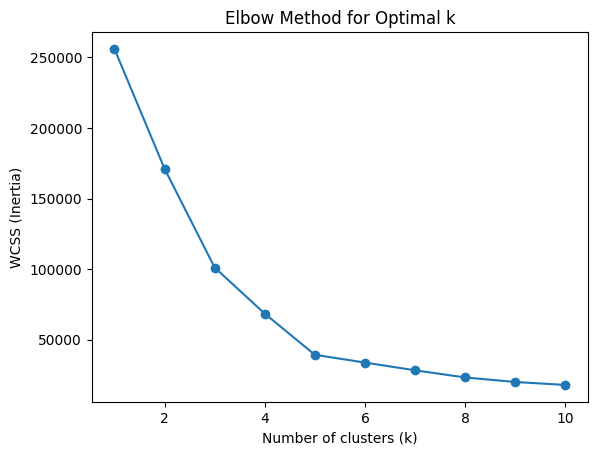

In [15]:
wcss = []
K = range(1, 11)  # test k from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cs)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot elbow
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

**Creating The Model**

In [16]:
kmeans = KMeans (n_clusters=5, random_state=0)
kmeans.fit(cs)

KMeans(n_clusters=5, random_state=0)

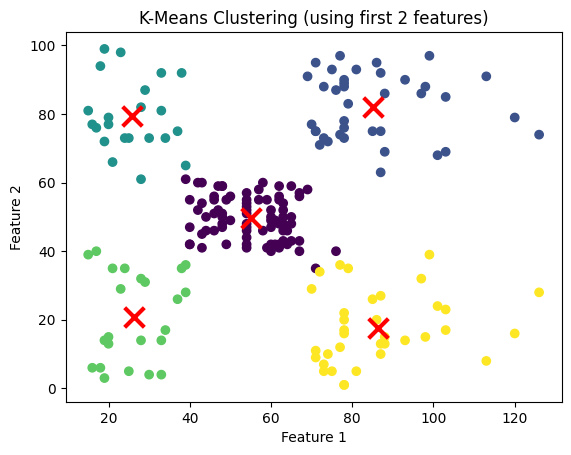

In [17]:
plt.scatter(cs[:, 0], cs[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='x', s=200, linewidths=3, color='r')
plt.title("K-Means Clustering (using first 2 features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [18]:
score = silhouette_score(cs, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.5606825090788626
